# Tutorial: `spec_mod`

## Sample data
Sample imagery captured from a [Resonon](https://resonon.com/) Pika II VIS-NIR line scanning imager and ancillary sample files can be downloaded from this [link](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing).

Before trying this tutorial on your own machine, please download the [sample files](https://drive.google.com/drive/folders/1KpOBB4-qghedVFd8ukQngXNwUit8PFy_?usp=sharing) and place into a local directory of your choosing (and do not change the file names). Indicate the location of your sample files by modifying `data_dir`:

In [1]:
data_dir = r'F:\\nigo0024\Documents\hs_process_demo'

***

## Confirm your environment

Before trying the tutorials, be sure `hs_process` and its dependencies are [properly installed](installation.html#). If you installed in a *virtual environment*, first check we are indeed using the Python instance that was installed with the virtual environment:

In [2]:
import sys

print('Python install location: {0}'.format(sys.executable))

Python install location: C:\Users\nigo0024\Anaconda3\envs\msi_sip\python.exe


The *spec* folder that contains `python.exe` tells me that the activated Python instance is indeed in the `spec` environment, just as I intend. If you created a virtual environment, but your `python.exe` is not in the `envs\spec` directory, you either did not properly create your virtual environment or you are not pointing to the correct Python installation in your IDE (e.g., Spyder, Jupyter notebook, etc.).  

***

## `spec_mod.load_spyfile`
Loads a `SpyFile` (Spectral Python object) for data access and/or manipulation by the `hstools` class. [[API]](api/hs_process.spec_mod.html#hs_process.spec_mod.load_spyfile)

Load and initialize the `hsio` and `spec_mod` modules

In [3]:
import os
from hs_process import hsio
from hs_process import spec_mod

fname_in = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio(fname_in)
my_spec_mod = spec_mod(io.spyfile)

Load datacube using ``spec_mod.load_spyfile``

In [4]:
my_spec_mod.load_spyfile(io.spyfile)
my_spec_mod.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

***

## `spec_mod.spectral_clip`
Removes/clips designated wavelength bands from the hyperspectral datacube. [[API]](api/hs_process.spec_mod.html#hs_process.spec_mod.spectral_clip)

Load and initialize the `hsio` and `spec_mod` modules

In [5]:
from hs_process import hsio
from hs_process import spec_mod

fname_hdr = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io1 = hsio()
io1.read_cube(fname_hdr)
my_spec_mod = spec_mod(io1.spyfile)

Using `spec_mod.spectral_clip`, clip all spectral bands below *420 nm* and above *880 nm*, as well as the bands near the oxygen absorption (i.e., *760-776 nm*) and water absorption (i.e., *813-827 nm*) regions.

In [6]:
array_clip, metadata = my_spec_mod.spectral_clip(wl_bands=[[0, 420], [760, 776], [813, 827], [880, 1000]])

Save the clipped datacube

In [7]:
fname_hdr_clip = os.path.join(data_dir, 'spec_mod', 'Wells_rep2_20180628_16h56m_pika_gige_7-clip.bip.hdr')
if not os.path.isdir(os.path.dirname(fname_hdr_clip)):  # create a new folder named "spec_mod" if it does not exist
    os.mkdir(os.path.dirname(fname_hdr_clip))

io1.write_cube(fname_hdr_clip, array_clip, metadata, force=True)

Initialize a second instance of `hsio` and read in the clipped cube to compare the clipped cube to the unclipped cube

In [8]:
io2 = hsio()  # initialize a second instance to compare cubes
io2.read_cube(fname_hdr_clip)
io1.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           240
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

The unclipped cube (above) has 240 spectral bands, while the clipped cube (below) has 210.

In [9]:
io2.spyfile

	Data Source:   'F:\\nigo0024\Documents\hs_process_demo\spec_mod\Wells_rep2_20180628_16h56m_pika_gige_7-clip.bip'
	# Rows:            617
	# Samples:        1300
	# Bands:           210
	Interleave:        BIP
	Quantization:  32 bits
	Data format:   float32

***

## `spec_mod.spectral_smooth`
Performs Savitzky-Golay smoothing on the spectral domain. [[API]](api/hs_process.spec_mod.html#hs_process.spec_mod.spectral_smooth)

Load and initialize the `hsio` and `spec_mod` modules

In [10]:
from hs_process import hsio
from hs_process import spec_mod

fname_hdr = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()
io.read_cube(fname_hdr)
my_spec_mod = spec_mod(io.spyfile)

Use `spec_mod.spectral_smooth` to perform a *Savitzky-Golay* smoothing operation across the hyperspectral spectral signature.

In [11]:
array_smooth, metadata = my_spec_mod.spectral_smooth(window_size=11, order=2)

Save the smoothed datacube using `hsio.write_cube`

In [12]:
fname_hdr_smooth = os.path.join(data_dir, 'spec_mod', 'Wells_rep2_20180628_16h56m_pika_gige_7-smooth.bip.hdr')
io.write_cube(fname_hdr_smooth, array_smooth, metadata, force=True)

Open smoothed datacube in Spectronon software to visualize the result of the smoothing for a specific pixel. Before smoothing (the spectral curve of the pixel at the *800th column/sample* and *200th row/line* is plotted):
![spectral_smooth_before](../.././docs/source/img/spec_mod/spectral_smooth_before.png)

And after smoothing (the spectral curve of the pixel at the *800th column/sample* and *200th row/line* is plotted):
![spectral_smooth_after](../.././docs/source/img/spec_mod/spectral_smooth_after.png) 

***

## `spec_mod.spectral_mimic`
Mimics the response of a multispectral sensor based on transmissivity of sensor bands across a range of wavelength values by calculating its weighted average response and interpolating the hyperspectral response. [[API]](api/hs_process.spec_mod.html#hs_process.spec_mod.spectral_mimic)

Load and initialize the `hsio` and `spec_mod` modules

In [13]:
from hs_process import hsio
from hs_process import spec_mod

fname_hdr = os.path.join(data_dir, 'Wells_rep2_20180628_16h56m_pika_gige_7-Radiance Conversion-Georectify Airborne Datacube-Convert Radiance Cube to Reflectance from Measured Reference Spectrum.bip.hdr')
io = hsio()
io.read_cube(fname_hdr)

my_spec_mod = spec_mod(io.spyfile)

Use `spec_mod.spectral_mimic` to mimic the [Sentinel-2A spectral response function](https://sentinel.esa.int/web/sentinel/document-library/content/-/article/sentinel-2a-spectral-responses).

In [14]:
array_s2a, metadata_s2a = my_spec_mod.spectral_mimic(sensor='sentinel-2a', center_wl='weighted')

Plot the mean spectral response of the hyperspectral image to that of the mimicked Sentinel-2A image bands (mean calculated across the entire image).

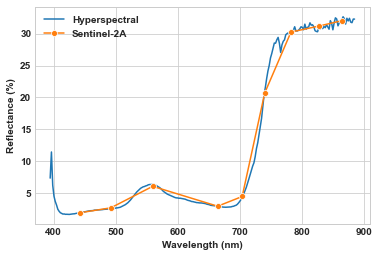

In [15]:
import seaborn as sns
from ast import literal_eval

array_hs = my_spec_mod.spyfile.open_memmap()
mean_hs = array_hs.mean(axis=(0,1))*100
mean_s2a = array_s2a.mean(axis=(0,1))*100

x1 = my_spec_mod.tools.get_wavelength_range([0,239])  # list of wavelength values
x2 = sorted(list(literal_eval(metadata_s2a['wavelength'])))  # list of Sentinel-2A bands
ax = sns.lineplot(x=x1, y=mean_hs, label='Hyperspectral')
ax = sns.lineplot(x=x2, y=mean_s2a, ax=ax, label='Sentinel-2A', marker='o', ms=6)
_ = ax.set(xlabel='Wavelength (nm)', ylabel='Reflectance (%)')

Use `spec_mod.spectral_mimic` to mimic the [Sentera 6x spectral configuration](https://sentera.com/6x/) and compare to both hyperspectral and Sentinel-2A.

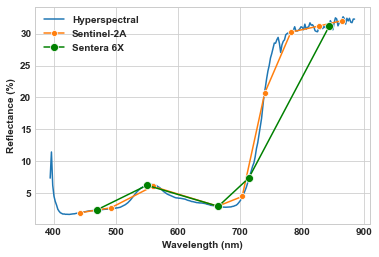

In [16]:
array_6x, metadata_6x = my_spec_mod.spectral_mimic(sensor='sentera_6x', center_wl='peak')
mean_6x = array_6x.mean(axis=(0,1))*100

x3 = sorted(list(literal_eval(metadata_6x['wavelength'])))  # list of Sentera 6X bands
ax = sns.lineplot(x=x1, y=mean_hs, label='Hyperspectral')
ax = sns.lineplot(x=x2, y=mean_s2a, ax=ax, label='Sentinel-2A', marker='o', ms=6)
ax = sns.lineplot(x=x3, y=mean_6x, ax=ax, label='Sentera 6X', color='green', marker='o', ms=8)
_ = ax.set(xlabel='Wavelength (nm)', ylabel='Reflectance (%)')

And finally, mimic the [Micasense RedEdge-MX](https://micasense.com/rededge-mx/) and compare to both hyperspectral and Sentinel-2A.

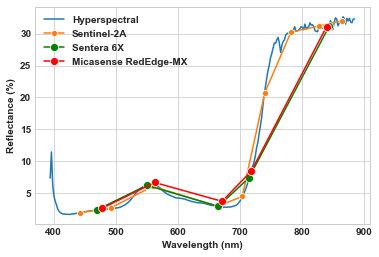

In [17]:
array_re, metadata_re = my_spec_mod.spectral_mimic(sensor='micasense_rededge_3', center_wl='peak')
mean_re = array_re.mean(axis=(0,1))*100

x4 = sorted(list(literal_eval(metadata_re['wavelength'])))  # list of Micasense RedEdge-MX bands
ax = sns.lineplot(x=x1, y=mean_hs, label='Hyperspectral')
ax = sns.lineplot(x=x2, y=mean_s2a, ax=ax, label='Sentinel-2A', marker='o', ms=6)
ax = sns.lineplot(x=x3, y=mean_6x, ax=ax, label='Sentera 6X', color='green', marker='o', ms=8)
ax = sns.lineplot(x=x4, y=mean_re, ax=ax, label='Micasense RedEdge-MX', color='red', marker='o', ms=8)
_ = ax.set(xlabel='Wavelength (nm)', ylabel='Reflectance (%)')